In [1]:
import os
import pandas as pd
from copy import deepcopy
from os import listdir
from os.path import isfile, join
import string
import numpy as np
import re

In [7]:

!pip install wget

import wget

# Replace with the actual URL of your file
file_url = ["https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/dataframe_snomed.csv","https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_cms_data.xlsx",
            "https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_mimic_data.xlsx","https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_synthea_data.xlsx"] # Example: https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/

# Download the file
for x in file_url:
  wget.download(file_url[x])





TypeError: list indices must be integers or slices, not str

In [ ]:
!pip install wget

import wget

file_urls = [
    "https://raw.githubusercontent.com/GConte47/tirocinio/main/file/dataframe_snomed.csv",
    "https://raw.githubusercontent.com/GConte47/tirocinio/main/file/omop_cms_data.xlsx",
    "https://raw.githubusercontent.com/GConte47/tirocinio/main/file/omop_mimic_data.xlsx",
    "https://raw.githubusercontent.com/GConte47/tirocinio/main/file/omop_synthea_data.xlsx"
]

for url in file_urls:
    try:
        filename = wget.download(url)
        print(f"\nScaricato: {filename}")
    except Exception as e:
        print(f"\nErrore durante il download di {url}: {str(e)}")


In [11]:
# Download the models and required data

!wget -N https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/dataframe_snomed.csv
!wget -N https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_cms_data.xlsx
!wget -N https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_mimic_data.xlsx
!wget -N https://raw.githubusercontent.com/GConte47/tirocinio/tree/main/file/omop_synthea_data.xlsx

zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget


#  OMAP: A New Benchmark Dataset



Leggere quanto scritto nel file "OMAP.pdf"

è costituito da questi file

omop_synthea_data.xlsx
omop_mimic_data.xlsx
omop_cms_data.xlsx

dal quale ho ricavato le 4 tabelle che sono state usate in MedCat

TabellaOMOP.csv
TabellaCMS.csv
TabellaSYNTHEA.csv
TabellaMIMIC.csv




In [3]:
import pandas as pd

In [2]:
Synthea=pd.read_excel('omop_synthea_data.xlsx')
Csm=pd.read_excel('omop_cms_data.xlsx')
Mimic=pd.read_excel('omop_mimic_data.xlsx')

In [3]:
len(Synthea[['omop']].drop_duplicates()), len(Csm[['omop']].drop_duplicates()), len(Synthea[['table']].drop_duplicates()), len(Csm[['table']].drop_duplicates()),


(267, 267, 111, 96)

In [4]:
Synthea['SOURCE']='Synthea'
Csm['SOURCE']='Csm'
Mimic['SOURCE']='Mimic'
df = pd.concat([Synthea, Csm,Mimic])

In [5]:
# consideriamo prima gli attributi di OMOP-CDM
TABELLE_ATTRIBUTI_OMOP=df[['omop','des1','d1','d2']].drop_duplicates()
TABELLE_ATTRIBUTI_OMOP[['Tabella', 'Attributo']] = TABELLE_ATTRIBUTI_OMOP['omop'].str.split('-', expand=True)
TABELLE_ATTRIBUTI_OMOP['SOURCE']='OMOP'
pd.set_option('display.max_colwidth', None)
# rinomino le colonne
TABELLE_ATTRIBUTI_OMOP.columns
TABELLE_ATTRIBUTI_OMOP.columns=['AttributoNomeCompleto','DescrizioneCompleta', 
                               'DescrizioneTabella','DescrizioneAttributo','Tabella', 'Attributo','SOURCE']

In [6]:
## per avere lista di tabelle e attributi OMOP
#TABELLE_ATTRIBUTI_OMOP.groupby('Tabella')['Attributo'].agg(['count', list]).reset_index()


In [7]:
TABELLE_ATTRIBUTI_LOCALI=df[['SOURCE','table','des2','d3','d4']].drop_duplicates()
TABELLE_ATTRIBUTI_LOCALI[['Tabella', 'Attributo']] = TABELLE_ATTRIBUTI_LOCALI['table'].str.split('-', expand=True)
TABELLE_ATTRIBUTI_LOCALI.columns
TABELLE_ATTRIBUTI_LOCALI.columns=['SOURCE','AttributoNomeCompleto','DescrizioneCompleta', 
                               'DescrizioneTabella','DescrizioneAttributo','Tabella', 'Attributo']
TABELLE_ATTRIBUTI_LOCALI.sample()

#print(TABELLE_ATTRIBUTI_LOCALI['AttributoNomeCompleto'].is_unique)

,SOURCE,AttributoNomeCompleto,DescrizioneCompleta,DescrizioneTabella,DescrizioneAttributo,Tabella,Attributo
179,Mimic,microbiologyevents-ab_itemid,"microbiologyevents contains microbiology information, including tests performed and sensitivities.;ab_itemid is the id is listed here, if an antibiotic was tested against the given organism for sensitivity.","microbiologyevents contains microbiology information, including tests performed and sensitivities.","ab_itemid is the id is listed here, if an antibiotic was tested against the given organism for sensitivity.",microbiologyevents,ab_itemid


In [8]:
# uniformiamo anche lo schema OMOP con lo schema
TABELLE_ATTRIBUTI_LOCALI.columns


Index(['SOURCE', 'AttributoNomeCompleto', 'DescrizioneCompleta',
       'DescrizioneTabella', 'DescrizioneAttributo', 'Tabella', 'Attributo'],
      dtype='object')

In [9]:
TABELLE_ATTRIBUTI_OMOP=TABELLE_ATTRIBUTI_OMOP[['SOURCE','AttributoNomeCompleto','DescrizioneCompleta', 
                               'DescrizioneTabella','DescrizioneAttributo','Tabella', 'Attributo']].copy()

In [10]:
SCHEMI=pd.concat([TABELLE_ATTRIBUTI_OMOP,TABELLE_ATTRIBUTI_LOCALI])

In [11]:
# purtroppo AttributoNomeCompleto non è univoco, non è chiave
SCHEMI[SCHEMI['AttributoNomeCompleto'].duplicated(keep=False)]

# quindi come chiave per individuare un attributo dobbiamo sempre usare
# la coppia SOURCE e AttributoNomeCompleto

,SOURCE,AttributoNomeCompleto,DescrizioneCompleta,DescrizioneTabella,DescrizioneAttributo,Tabella,Attributo
87,Synthea,patients-gender,"patient demographic data.;gender. m is male, f is female.",patient demographic data.,"gender. m is male, f is female.",patients,gender
201,Mimic,patients-gender,patients contains all charted data for all patients.;gender is the genotypical sex of the patient.,patients contains all charted data for all patients.,gender is the genotypical sex of the patient.,patients,gender


In [12]:
SCHEMI.to_csv("SCHEMI.csv", index=False)

In [13]:
# meglio ordinati così
SCHEMI=SCHEMI[['SOURCE','AttributoNomeCompleto','Tabella', 'Attributo','DescrizioneCompleta', 
                               'DescrizioneTabella','DescrizioneAttributo']].copy()

# ovviamente è ridondante (vari attributi si calcolano da altri) e non è in forma normale
# DescrizioneTabella dipende da Tabella, quindi ripetuta

In [14]:
SCHEMI=pd.read_csv("SCHEMI.csv")


## Annotazione

Ora leggo le annotazioni. 
Non ho disponibili gli ultimi file, quindi per mostrare concetti  uso questo

In [15]:
Annotazione=pd.read_csv("dataframe_snomed.csv")
# diamo un nome  a questa annotazione
Annotazione['TipoDiAnnotazione']='dataframe_snomed'
Annotazione.columns

Index(['text', 'entity_id', 'pretty_name', 'cui', 'type_ids', 'types',
       'source_value', 'detected_name', 'acc', 'context_similarity',
       'ontologies', 'names', 'TipoDiAnnotazione'],
      dtype='object')

In [16]:
# text dovrebbe corrispondere a Descrizione completa
# ma mi sembra che sia stata tolta la , e altri caratteri

# names dovrebbe corrispondere a AttributoNomeCompleto
# con la differenza che qui ho indicato tutto con _ 
Annotazione[['names']].head()

,names
0,beneficiarysummary_bene_birth_dt
1,beneficiarysummary_bene_death_dt
2,beneficiarysummary_bene_esrd_ind
3,beneficiarysummary_sp_state_code
4,beneficiarysummary_bene_hi_cvrage_tot_mons


In [17]:
# dobbiamo uniformare i nomi degli attributi in Schemi
SCHEMI['names'] = SCHEMI['AttributoNomeCompleto'].apply(lambda x: x.replace('-', '_', 1))

In [18]:
pd.merge(Annotazione[['names']].drop_duplicates(), SCHEMI[['names']], 
         on='names', how='outer', indicator=True).query("_merge == 'right_only'")

,names,_merge
23,beneficiarysummary_bene_county_cd,right_only
28,beneficiarysummary_bene_race_cd,right_only
29,beneficiarysummary_bene_sex_ident_cd,right_only
34,beneficiarysummary_desynpuf_id,right_only


In [19]:
# per questi 4 attributi non abbiamo ottenuto alcuna annotazione

In [20]:
# come detto prima in SCHEMI  AttributoNomeCompleto non è univoco, non è chiave 
# neanche names lo sarà
SCHEMI[SCHEMI['names'].duplicated(keep=False)]

,SOURCE,AttributoNomeCompleto,DescrizioneCompleta,DescrizioneTabella,DescrizioneAttributo,Tabella,Attributo,names
354,Synthea,patients-gender,"patient demographic data.;gender. m is male, f is female.",patient demographic data.,"gender. m is male, f is female.",patients,gender,patients_gender
675,Mimic,patients-gender,patients contains all charted data for all patients.;gender is the genotypical sex of the patient.,patients contains all charted data for all patients.,gender is the genotypical sex of the patient.,patients,gender,patients_gender


In [21]:
# quindi per questi due non posso usare names per risalire in modo univoco
# all'attributo 
# ecco perchè quando costruiremo le nostre annotazioni dobbiamo sempre mettere 
# SOURCE e AttributoNomeCompleto
# altrimenti in presenza di molte sorgenti non c'è univocità
# 

In [22]:
# per concludere qui il discorso, trascuriamo questi attributi

Annotazione = Annotazione[Annotazione['names'] != 'patients_gender']

SCHEMI = SCHEMI[SCHEMI['names'] != 'patients_gender']


In [23]:
NuovaAnnotazione=Annotazione.merge(SCHEMI[['names', 'SOURCE', 'AttributoNomeCompleto']])

In [24]:
NuovaAnnotazione.columns

Index(['text', 'entity_id', 'pretty_name', 'cui', 'type_ids', 'types',
       'source_value', 'detected_name', 'acc', 'context_similarity',
       'ontologies', 'names', 'TipoDiAnnotazione', 'SOURCE',
       'AttributoNomeCompleto'],
      dtype='object')

In [25]:
# ora possiamo togliere 'text', 'names' dal NuovaAnnotazione

In [26]:
NuovaAnnotazione = NuovaAnnotazione.drop(columns=['text', 'names'])

In [27]:
# riordino le colonne
NuovaAnnotazione=NuovaAnnotazione[[
    'TipoDiAnnotazione', 'ontologies', 'SOURCE', 'AttributoNomeCompleto',
    'entity_id', 'pretty_name', 'cui', 'type_ids', 'types', 'source_value',
       'detected_name', 'acc', 'context_similarity'       ]]

In [39]:
NuovaAnnotazione.head(20)

,TipoDiAnnotazione,ontologies,SOURCE,AttributoNomeCompleto,entity_id,pretty_name,cui,type_ids,types,source_value,detected_name,acc,context_similarity
0,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_birth_dt,1,Date of birth,184099003,['2680757'],['observable entity'],date of birth,date~of~birth,1.00,1.00
1,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_death_dt,1,Date of death,399753006,['2680757'],['observable entity'],date of death,date~of~death,1.00,1.00
2,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_esrd_ind,2,End-stage renal disease,46177005,['9090192'],['disorder'],end stage renal disease,end~stage~renal~disease,1.00,1.00
3,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-sp_state_code,0,State,398070004,['75168589'],['environment'],state,state,1.00,1.00
4,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_hi_cvrage_tot_mons,0,Total,255619001,['7882689'],['qualifier value'],total,total,0.99,0.99
5,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_hi_cvrage_tot_mons,3,In (attribute),18720000,['43039974'],['attribute'],of part,of~part,1.00,1.00
6,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_smi_cvrage_tot_mons,0,Total,255619001,['7882689'],['qualifier value'],total,total,0.99,0.99
7,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_smi_cvrage_tot_mons,3,In (attribute),18720000,['43039974'],['attribute'],of part,of~part,1.00,1.00
8,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-bene_hmo_cvrage_tot_mons,0,Total,255619001,['7882689'],['qualifier value'],total,total,0.99,0.99
9,dataframe_snomed,['SNOMED-CT'],Csm,beneficiarysummary-plan_cvrg_mos_num,0,Total,255619001,['7882689'],['qualifier value'],total,total,0.99,0.99


In [29]:
# questo è un primo esempio di Annotazione
# 
# rispetto a quanto fatto finora è stato solo riorganizzato in modo da renderlo più semplice da gestire



#LOINC_TABELLE_ATTRIBUTI_LOCALI_COMPLETO_ANNOTAZIONI

# Domenico 21 febbraio


In [42]:
# Ora carico quest'altra annotazione, ottenuta con Bioportal rispetto a SNOMED utilizzando la descrizione del solo attributo

DescrizioneAttributo_SNOMED=pd.read_csv("DescrizioneAttributo_SNOMED.csv")
DescrizioneAttributo_SNOMED['TipoDiAnnotazione'] = 'Bioportal_SNOMED_DescrizioneSoloAttributo'


DescrizioneAttributo_SNOMED.columns

In [44]:

# questo è il dataframe generale in cui inserire tutte le annotazioni
# lo avevamo definito tempo fa, controlla che sia coerente con quella definizione ed evidenzia qui nel notebook le differenze
ANNOTAZIONI= DescrizioneAttributo_SNOMED


In [48]:
# effettuando il join con SCHEMI posso pescare le altre informazioni, tra cui  il nome della tabella ed il nome dell'attributo
ANNOTAZIONI=ANNOTAZIONI.merge(SCHEMI)

In [49]:
# vedo le tabelle presenti
ANNOTAZIONI[ANNOTAZIONI.SOURCE=='OMOP'][['Tabella']].drop_duplicates()

,Tabella
0,person
107,visit_occurrence
176,visit_detail
253,specimen
324,measurement
424,procedure_occurrence
480,condition_occurrence
549,death
585,location
606,observation


In [52]:
# considero una tabella ad esempio observation
# per verificare se ho delle annotazioni
ANNOTAZIONI[(ANNOTAZIONI.SOURCE=='OMOP')& (ANNOTAZIONI.Tabella=='observation') ].shape
# trovo 64 righe quindi ok, pendiamola come esempio

(64, 13)

In [61]:
# vedo gli attributi di questa tabella
ANNOTAZIONI[(ANNOTAZIONI.SOURCE=='OMOP')& (ANNOTAZIONI.Tabella=='observation') ][['AttributoNomeCompleto']].drop_duplicates()


,AttributoNomeCompleto
606,observation-observation_id
607,observation-person_id
610,observation-observation_concept_id
611,observation-observation_date
614,observation-observation_datetime
620,observation-observation_type_concept_id
624,observation-value_as_number
626,observation-value_as_string
629,observation-value_as_concept_id
636,observation-qualifier_concept_id


In [53]:
# ora cerco OMOP observation in medical-data-models.org
# https://medical-data-models.org/search?query=OMOP+observation

VEDO ALCUNI ATTRIBUTI

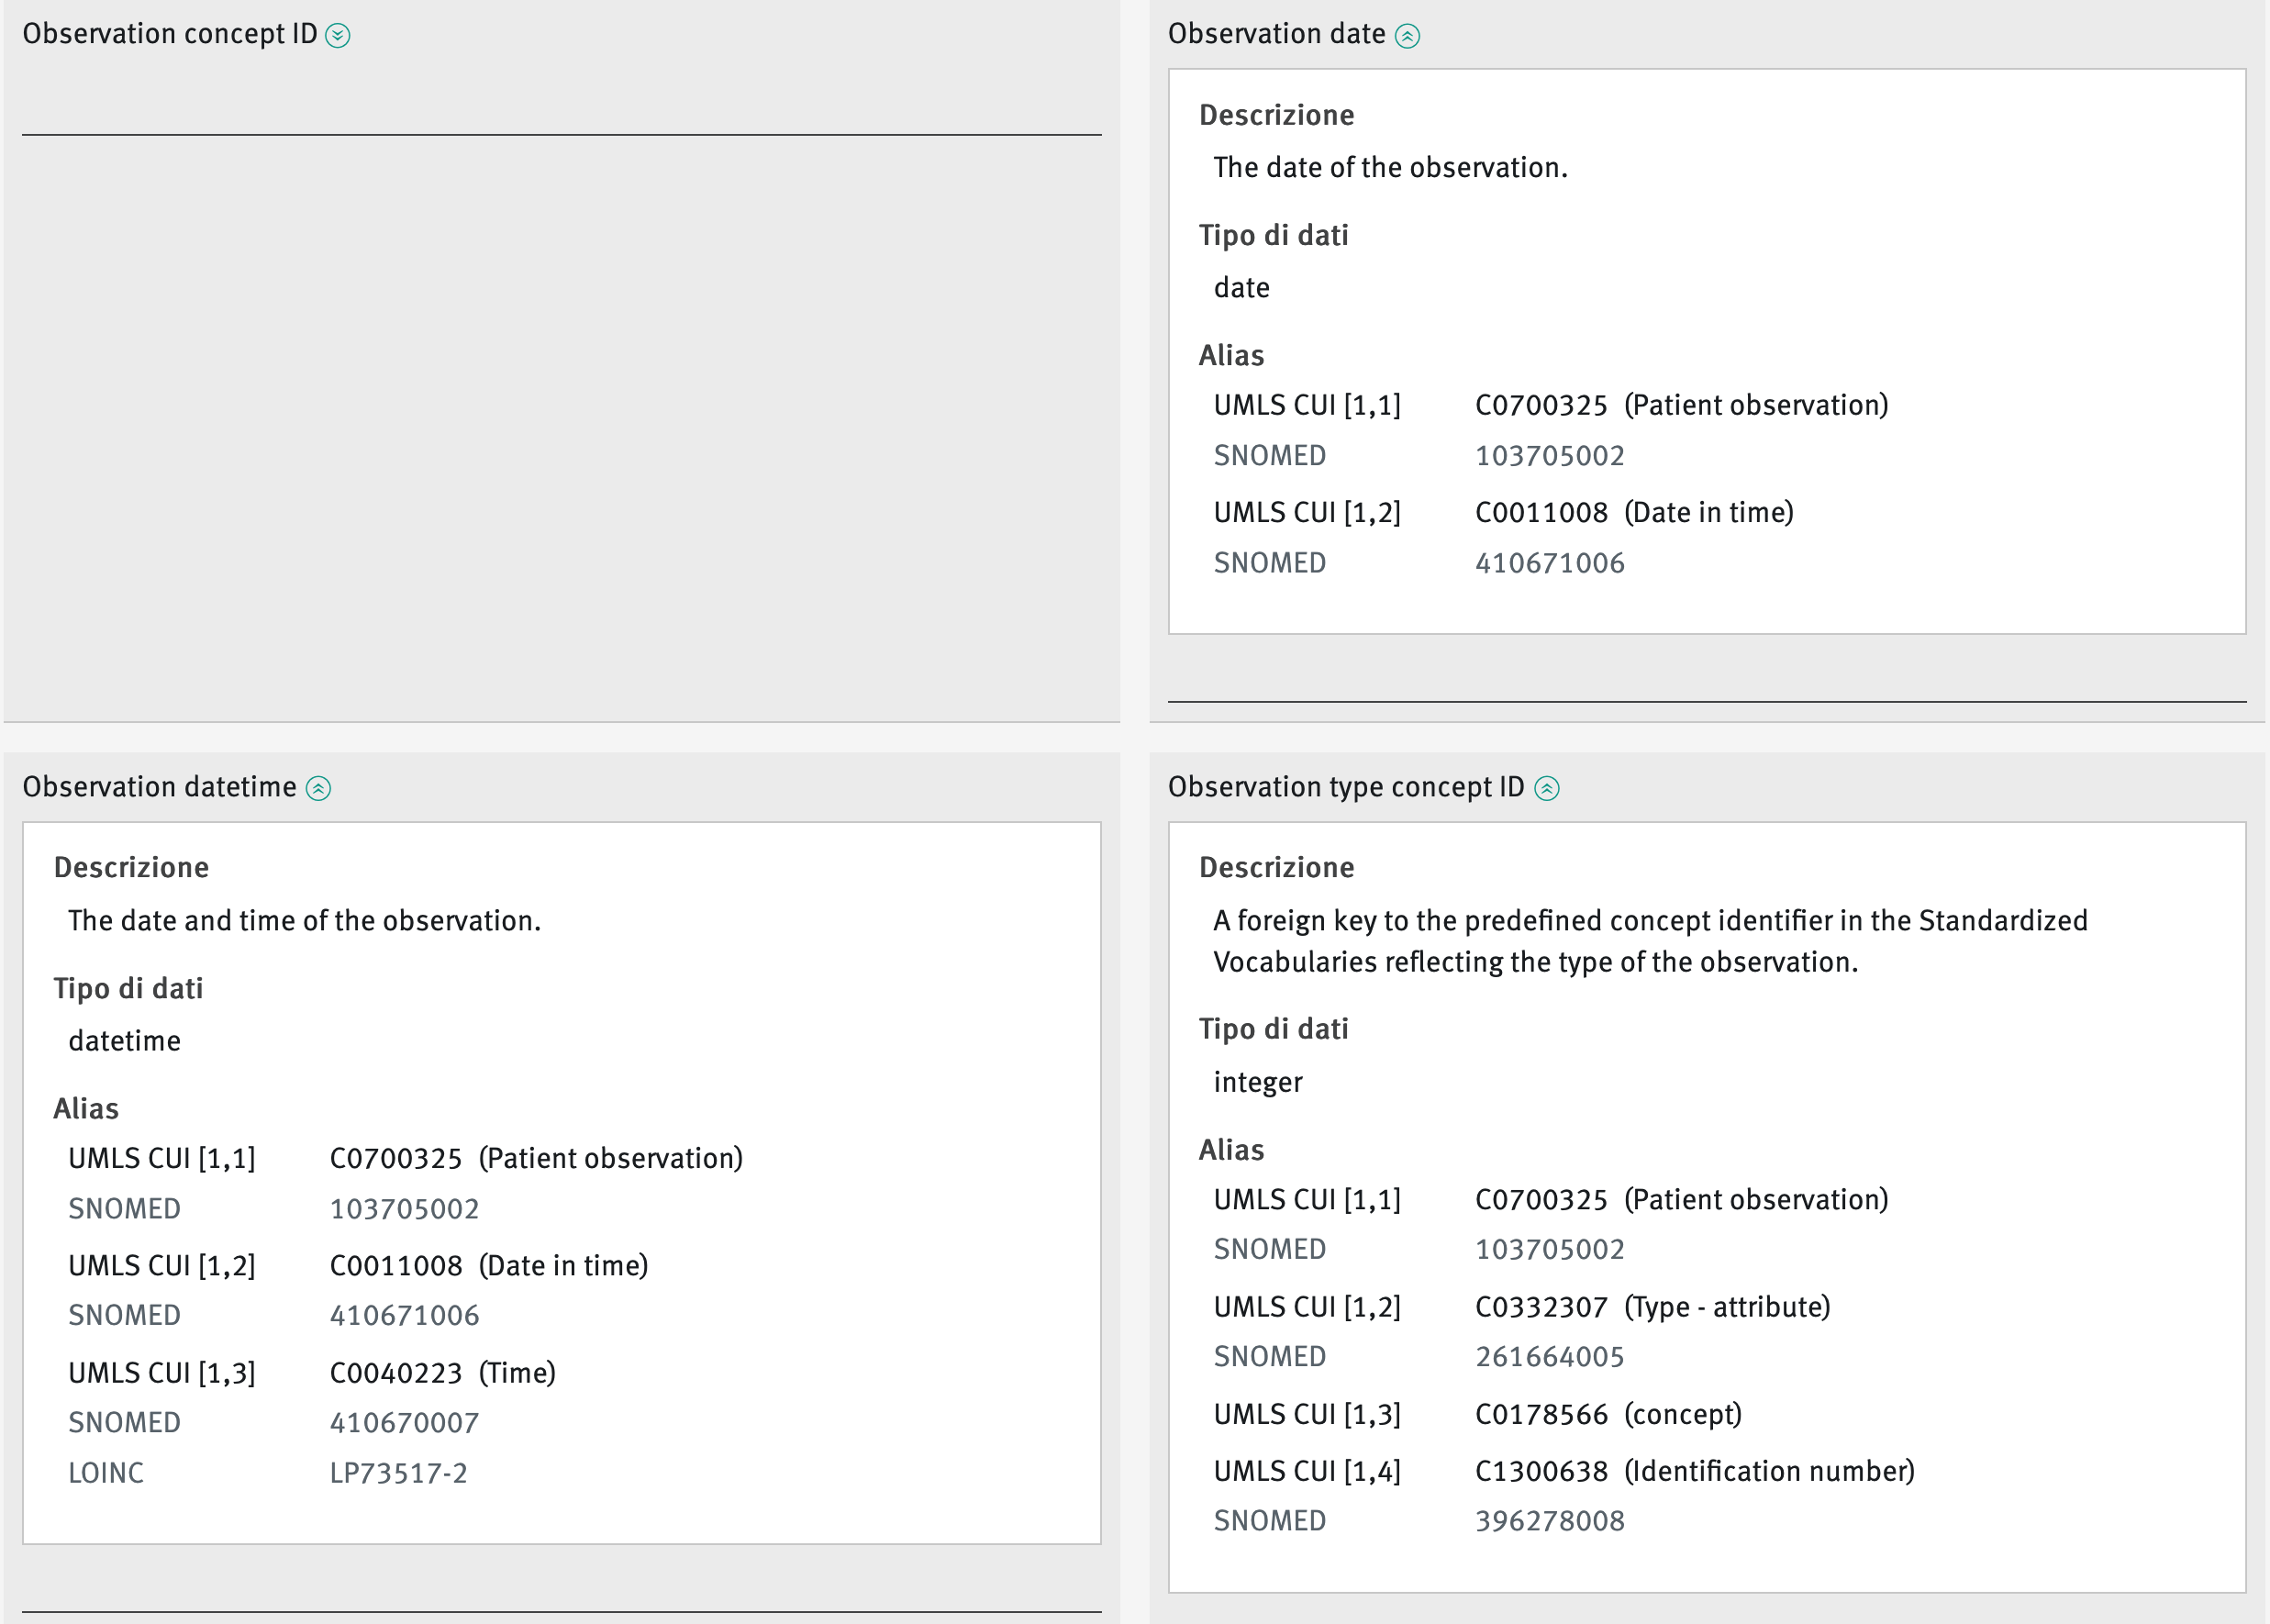




In [ ]:
# e manualmente li riporto in un dataframe fatto come gli altri
# per semplicità riporto solo il codice dell'elemento

#['SOURCE', 'AttributoNomeCompleto', 'Numero', 'Ontologia', 'Codice',        'Description']
      

In [58]:

data = {
    "Numero": [1, 2, 3, 1, 2, 3, 1],
    "Ontologia": ["UMLS", "UMLS", "UMLS", "SNOMED", "SNOMED", "SNOMED", "LOINC"],
    "Codice": ["C0700325", "C0011008", "C0040223", "410671006", "103705002", "410670007", "LP73517-2"]
}

df = pd.DataFrame(data)
df['AttributoNomeCompleto']='observation-observation_datetime'
df['SOURCE']='OMOP'
df['TipoDiAnnotazione'] = 'medical-data-models'

df
##### QUESTO è il GOLD STANDARD per un attributo OMOP

,Numero,Ontologia,Codice,AttributoNomeCompleto,SOURCE,TipoDiAnnotazione
0,1,UMLS,C0700325,observation_datetime,OMOP,medical-data-models
1,2,UMLS,C0011008,observation_datetime,OMOP,medical-data-models
2,3,UMLS,C0040223,observation_datetime,OMOP,medical-data-models
3,1,SNOMED,410671006,observation_datetime,OMOP,medical-data-models
4,2,SNOMED,103705002,observation_datetime,OMOP,medical-data-models
5,3,SNOMED,410670007,observation_datetime,OMOP,medical-data-models
6,1,LOINC,LP73517-2,observation_datetime,OMOP,medical-data-models


In [ ]:
# posso confrontare questo GOLD standard con quello ottenuto dai miei sistemi di annotazione


In [66]:
ANNOTAZIONI[(ANNOTAZIONI.SOURCE=='OMOP')& (ANNOTAZIONI.AttributoNomeCompleto=='observation-observation_datetime') ][['Numero', 'Ontologia', 'Codice', 'AttributoNomeCompleto', 'SOURCE',
       'TipoDiAnnotazione']]


,Numero,Ontologia,Codice,AttributoNomeCompleto,SOURCE,TipoDiAnnotazione
614,1,SNOMEDCT,410672004,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
615,2,SNOMEDCT,410671006,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
616,3,SNOMEDCT,227423000,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
617,4,SNOMEDCT,900000000000475002,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
618,5,SNOMEDCT,410669006,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
619,6,SNOMEDCT,410670007,observation-observation_datetime,OMOP,Bioportal_SNOMED_DescrizioneSoloAttributo
